In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg
/kaggle/input/cat-and-dog-classifier/data/cat_test.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images133.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images412.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images141.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images356.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images77.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images210.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images525.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images272.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images68.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images360.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images69.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images396.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images239.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images494.jpg
/kaggle/input/cat-and-dog-classifier/data/Dog/images

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr

%matplotlib inline

خب اول میایم و فایل اصلی دیتاست که شامل دو کلاس سگ و گربه میشه رو فراخوانی میکنیم:

Well,first we must read the main data file, which includes two classes, dog and cat:

In [3]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/cat-and-dog-classifier/data')

Found 1152 files belonging to 2 classes.


2023-01-25 19:15:27.632540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 19:15:27.718858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 19:15:27.719621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 19:15:27.724557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

2023-01-25 19:15:30.291029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...


در پلات زیر میبینیم که به گربه عدد 0 و به سگ عدد 1 داده شده است

In the plot below, we see that the cat is given the number 0 and the dog is given the number 1

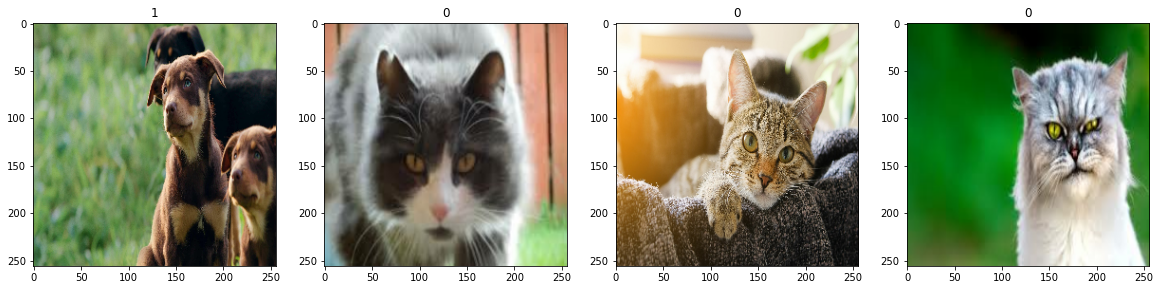

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Dog = 1

Cat= 0

# Scale Data

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...


(array([[[[0.99607843, 1.        , 0.99215686],
          [0.99607843, 1.        , 0.99215686],
          [0.9893382 , 0.9949449 , 0.98541665],
          ...,
          [0.18318015, 0.12435662, 0.        ],
          [0.202788  , 0.14396445, 0.        ],
          [0.22935049, 0.17052697, 0.01075368]],
 
         [[0.9900534 , 0.99240196, 0.9840691 ],
          [0.9870706 , 0.99191225, 0.97983974],
          [0.98337257, 0.9878959 , 0.9767353 ],
          ...,
          [0.19159438, 0.13277085, 0.        ],
          [0.20897624, 0.15015271, 0.        ],
          [0.2298402 , 0.17101668, 0.01075368]],
 
         [[0.9837345 , 0.98385704, 0.97394735],
          [0.9788689 , 0.98413855, 0.9668701 ],
          [0.9797019 , 0.98252046, 0.9687562 ],
          ...,
          [0.20330882, 0.1444853 , 0.00118049],
          [0.21791178, 0.15908825, 0.00206371],
          [0.23155925, 0.17273572, 0.0119514 ]],
 
         ...,
 
         [[0.34480458, 0.40473107, 0.18904479],
          [0.40936

# Split Data

برای اینکه ما کلا یک فایل اصلی داریم که شامل دو کلاس هست و برای مدل سازی نیاز به سه دسته تست و تِرین و ولیدیشن داریم، پس مجبوریم به صورت دستی این سه تا رو از داده های اصلی ایجاد کنیم

In order to model we need three categories of test, training, and validation, so we must manually create these three categories from the main file

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

25

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [12]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

# Train

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2023-01-25 19:15:35.228610: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-25 19:15:35.228666: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-25 19:15:35.230427: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2023-01-25 19:15:35.539709: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-25 19:15:35.539875: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [20]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/50


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2023-01-25 19:15:38.264016: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/25 [>.............................] - ETA: 3:21 - loss: 0.7074 - accuracy: 0.3750

2023-01-25 19:15:44.189387: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-25 19:15:44.189435: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/25 [=>............................] - ETA: 8s - loss: 1.7766 - accuracy: 0.4531  

2023-01-25 19:15:44.554812: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-25 19:15:44.555447: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2023-01-25 19:15:44.712576: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 140 callback api events and 137 activity events. 
2023-01-25 19:15:44.721976: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-25 19:15:44.738100: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_01_25_19_15_44

2023-01-25 19:15:44.743078: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.trace.json.gz


 5/25 [=====>........................] - ETA: 3s - loss: 1.1575 - accuracy: 0.5125

2023-01-25 19:15:44.761801: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_01_25_19_15_44

2023-01-25 19:15:44.763757: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.memory_profile.json.gz
2023-01-25 19:15:44.764554: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/train/plugins/profile/2023_01_25_19_15_44
Dumped tool data for xplane.pb to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.xplane.pb
Dumped tool data for overview_page.pb to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/train/plugins/profile/2023_01_25_19_15_44/6f76b2ee040d.tensorflow_stats.

 7/25 [=======>......................] - ETA: 4s - loss: 1.0321 - accuracy: 0.5134

Cleanup called...
Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.9906 - accuracy: 0.5000

Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.9579 - accuracy: 0.4931

Cleanup called...


14/25 [===============>..............] - ETA: 2s - loss: 0.8609 - accuracy: 0.5201

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.8237 - accuracy: 0.5104

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.7992 - accuracy: 0.5114

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.7855 - accuracy: 0.5138

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 25s 679ms/step - loss: 0.7855 - accuracy: 0.5138 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 2/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.6780 - accuracy: 0.5156

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5352

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5451

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.6829 - accuracy: 0.5771

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.6866 - accuracy: 0.5724

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.6872 - accuracy: 0.5625

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5625

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 625ms/step - loss: 0.6862 - accuracy: 0.5625 - val_loss: 0.6796 - val_accuracy: 0.5223
Epoch 3/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.6679 - accuracy: 0.5781

Cleanup called...


 7/25 [=======>......................] - ETA: 5s - loss: 0.6740 - accuracy: 0.5670

Cleanup called...
Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.6692 - accuracy: 0.5977

Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.6678 - accuracy: 0.6111

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.6550 - accuracy: 0.6458

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.6526 - accuracy: 0.6266

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.6425 - accuracy: 0.6420

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.6388

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 17s 646ms/step - loss: 0.6513 - accuracy: 0.6388 - val_loss: 0.6142 - val_accuracy: 0.6652
Epoch 4/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 12s - loss: 0.5829 - accuracy: 0.6719

Cleanup called...


 7/25 [=======>......................] - ETA: 5s - loss: 0.6388 - accuracy: 0.6116

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.6357 - accuracy: 0.6219

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.6229 - accuracy: 0.6562

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.6195 - accuracy: 0.6497

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.6161 - accuracy: 0.6534

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.6178 - accuracy: 0.6513

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 623ms/step - loss: 0.6178 - accuracy: 0.6513 - val_loss: 0.5774 - val_accuracy: 0.7009
Epoch 5/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.4715 - accuracy: 0.7969

Cleanup called...


 7/25 [=======>......................] - ETA: 4s - loss: 0.5577 - accuracy: 0.6920

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.5482 - accuracy: 0.7222

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.5598 - accuracy: 0.7063

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.5531 - accuracy: 0.7122

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.5610 - accuracy: 0.7045

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.7100

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 450ms/step - loss: 0.5581 - accuracy: 0.7100 - val_loss: 0.5009 - val_accuracy: 0.7500
Epoch 6/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.5149 - accuracy: 0.7656

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.4647 - accuracy: 0.7852

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.4558 - accuracy: 0.7882

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.4526 - accuracy: 0.7979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.4368 - accuracy: 0.8141

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.4413 - accuracy: 0.8040

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.8025

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 448ms/step - loss: 0.4457 - accuracy: 0.8025 - val_loss: 0.4503 - val_accuracy: 0.8304
Epoch 7/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.3069 - accuracy: 0.9375

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.3318 - accuracy: 0.8945

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 3s - loss: 0.3188 - accuracy: 0.8969

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.3410 - accuracy: 0.8750

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.3489 - accuracy: 0.8684

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.3462 - accuracy: 0.8707

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.3614 - accuracy: 0.8587

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.3614 - accuracy: 0.8587 - val_loss: 0.4881 - val_accuracy: 0.8036
Epoch 8/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.2291 - accuracy: 0.9219

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8906

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 3s - loss: 0.2771 - accuracy: 0.8969

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.2663 - accuracy: 0.9125

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.2705 - accuracy: 0.9030

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.2665 - accuracy: 0.9020

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.2740 - accuracy: 0.8975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 618ms/step - loss: 0.2740 - accuracy: 0.8975 - val_loss: 0.5245 - val_accuracy: 0.7857
Epoch 9/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.2462 - accuracy: 0.9219

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.2091 - accuracy: 0.9141

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.2038 - accuracy: 0.9201

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.1948 - accuracy: 0.9229

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.2052 - accuracy: 0.9161

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.2114 - accuracy: 0.9134

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9062

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 631ms/step - loss: 0.2273 - accuracy: 0.9062 - val_loss: 0.5120 - val_accuracy: 0.8259
Epoch 10/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.1883 - accuracy: 0.9531

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.1577 - accuracy: 0.9453

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.1499 - accuracy: 0.9514

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.1362 - accuracy: 0.9542

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.1350 - accuracy: 0.9572

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.1365 - accuracy: 0.9545

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1428 - accuracy: 0.9488

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 635ms/step - loss: 0.1428 - accuracy: 0.9488 - val_loss: 0.5755 - val_accuracy: 0.7902
Epoch 11/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.1174 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0928 - accuracy: 0.9883

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0889 - accuracy: 0.9861

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0876 - accuracy: 0.9771

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0831 - accuracy: 0.9786

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0833 - accuracy: 0.9773

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.9712

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 623ms/step - loss: 0.0971 - accuracy: 0.9712 - val_loss: 0.6015 - val_accuracy: 0.8527
Epoch 12/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0433 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0761 - accuracy: 0.9727

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0815 - accuracy: 0.9722

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.1045 - accuracy: 0.9583

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.1055 - accuracy: 0.9572

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.1020 - accuracy: 0.9588

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9488

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 622ms/step - loss: 0.1257 - accuracy: 0.9488 - val_loss: 0.5032 - val_accuracy: 0.8571
Epoch 13/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 14s - loss: 0.0489 - accuracy: 0.9844

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0558 - accuracy: 0.9883

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.0547 - accuracy: 0.9906

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0657 - accuracy: 0.9833

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0709 - accuracy: 0.9836

Cleanup called...


23/25 [==========================>...] - ETA: 0s - loss: 0.0812 - accuracy: 0.9728

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9638

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 622ms/step - loss: 0.1067 - accuracy: 0.9638 - val_loss: 0.4697 - val_accuracy: 0.8661
Epoch 14/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0304 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0595 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0609 - accuracy: 0.9931

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0678 - accuracy: 0.9854

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0653 - accuracy: 0.9852

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0639 - accuracy: 0.9844

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9837

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 619ms/step - loss: 0.0677 - accuracy: 0.9837 - val_loss: 0.5507 - val_accuracy: 0.8929
Epoch 15/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0246 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 6s - loss: 0.0697 - accuracy: 0.9732

Cleanup called...
Cleanup called...


 8/25 [========>.....................] - ETA: 5s - loss: 0.0680 - accuracy: 0.9727

Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.0615 - accuracy: 0.9757

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0478 - accuracy: 0.9833

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0470 - accuracy: 0.9852

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0497 - accuracy: 0.9844

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9800

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 17s 642ms/step - loss: 0.0573 - accuracy: 0.9800 - val_loss: 0.7571 - val_accuracy: 0.8571
Epoch 16/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0165 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0359 - accuracy: 0.9883

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0347 - accuracy: 0.9896

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0306 - accuracy: 0.9917

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0371 - accuracy: 0.9901

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0345 - accuracy: 0.9915

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9862

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 622ms/step - loss: 0.0546 - accuracy: 0.9862 - val_loss: 0.6881 - val_accuracy: 0.8661
Epoch 17/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0112 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0103 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 3s - loss: 0.0114 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0108 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0115 - accuracy: 1.0000

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0198 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 618ms/step - loss: 0.0198 - accuracy: 0.9962 - val_loss: 0.5459 - val_accuracy: 0.8750
Epoch 18/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0169 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 5s - loss: 0.0101 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.0090 - accuracy: 1.0000

Cleanup called...


14/25 [===============>..............] - ETA: 3s - loss: 0.0097 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0082 - accuracy: 1.0000

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 17s 660ms/step - loss: 0.0306 - accuracy: 0.9975 - val_loss: 0.4973 - val_accuracy: 0.8973
Epoch 19/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0063 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 4s - loss: 0.0062 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0062 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0071 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0069 - accuracy: 1.0000

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 451ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.6459 - val_accuracy: 0.8884
Epoch 20/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0041 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.0144 - accuracy: 0.9969

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0122 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0102 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0095 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9950

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.0389 - accuracy: 0.9950 - val_loss: 0.7010 - val_accuracy: 0.8839
Epoch 21/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0091 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0221 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0202 - accuracy: 0.9931

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0285 - accuracy: 0.9917

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0265 - accuracy: 0.9934

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0285 - accuracy: 0.9929

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9912

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 619ms/step - loss: 0.0360 - accuracy: 0.9912 - val_loss: 0.4880 - val_accuracy: 0.8705
Epoch 22/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0159 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0320 - accuracy: 0.9883

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0296 - accuracy: 0.9896

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0217 - accuracy: 0.9937

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9934

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9929

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9912

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 458ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.6094 - val_accuracy: 0.8839
Epoch 23/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0155 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0255 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0233 - accuracy: 0.9931

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0175 - accuracy: 0.9958

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0163 - accuracy: 0.9965

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0173 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 640ms/step - loss: 0.0236 - accuracy: 0.9962 - val_loss: 0.6283 - val_accuracy: 0.8795
Epoch 24/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 14s - loss: 0.0097 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0065 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0063 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0052 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0135 - accuracy: 0.9967

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0127 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 630ms/step - loss: 0.0124 - accuracy: 0.9975 - val_loss: 0.7576 - val_accuracy: 0.8884
Epoch 25/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0020 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0023 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0024 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0164 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0211 - accuracy: 0.9967

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0188 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 627ms/step - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.6872 - val_accuracy: 0.9062
Epoch 26/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0778 - accuracy: 0.9844

Cleanup called...


 7/25 [=======>......................] - ETA: 4s - loss: 0.0262 - accuracy: 0.9955

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0209 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0161 - accuracy: 0.9958

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0140 - accuracy: 0.9965

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0118 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 462ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.5936 - val_accuracy: 0.8884
Epoch 27/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 6.6447e-04 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0141 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0127 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0166 - accuracy: 0.9958

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0134 - accuracy: 0.9967

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0118 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 622ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.5544 - val_accuracy: 0.9107
Epoch 28/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 13s - loss: 0.0012 - accuracy: 1.0000    

Cleanup called...


 8/25 [========>.....................] - ETA: 5s - loss: 0.0070 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.0065 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0268 - accuracy: 0.9917

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0242 - accuracy: 0.9934

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0248 - accuracy: 0.9929

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9925

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 635ms/step - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.5196 - val_accuracy: 0.8839
Epoch 29/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0082 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0063 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0057 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0046 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0043 - accuracy: 1.0000

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 621ms/step - loss: 0.0082 - accuracy: 0.9987 - val_loss: 0.7632 - val_accuracy: 0.9062
Epoch 30/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0572 - accuracy: 0.9844

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0164 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 3s - loss: 0.0132 - accuracy: 0.9969

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0092 - accuracy: 0.9979

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0123 - accuracy: 0.9965

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0104 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 626ms/step - loss: 0.0178 - accuracy: 0.9962 - val_loss: 0.5239 - val_accuracy: 0.9107
Epoch 31/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0014 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0167 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0169 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0114 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0102 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0124 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9950

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.0223 - accuracy: 0.9950 - val_loss: 0.7689 - val_accuracy: 0.8884
Epoch 32/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0019 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0025 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0028 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0031 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0076 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0078 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 637ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.4584 - val_accuracy: 0.9062
Epoch 33/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0017 - accuracy: 1.0000    

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0133 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0109 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0099 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 623ms/step - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.5784 - val_accuracy: 0.9107
Epoch 34/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 6.6244e-04 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 5s - loss: 9.8704e-04 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0012 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0016 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0086 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 632ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.7666 - val_accuracy: 0.9062
Epoch 35/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0010 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0021 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0042 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0090 - accuracy: 0.9958

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0083 - accuracy: 0.9967

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0079 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 462ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.5577 - val_accuracy: 0.8839
Epoch 36/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 9s - loss: 0.0071 - accuracy: 1.0000 

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0030 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.0029 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0148 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0125 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0110 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 634ms/step - loss: 0.0162 - accuracy: 0.9975 - val_loss: 0.6431 - val_accuracy: 0.8884
Epoch 37/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0019 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0037 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0034 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0028 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0050 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0044 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 13s 482ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.6522 - val_accuracy: 0.8973
Epoch 38/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0627 - accuracy: 0.9844

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0221 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 3s - loss: 0.0200 - accuracy: 0.9937

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0267 - accuracy: 0.9917

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9934

Cleanup called...


23/25 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9932

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9912

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 617ms/step - loss: 0.0254 - accuracy: 0.9912 - val_loss: 0.9467 - val_accuracy: 0.8616
Epoch 39/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0203 - accuracy: 0.9844

Cleanup called...


 7/25 [=======>......................] - ETA: 4s - loss: 0.0191 - accuracy: 0.9911

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0314 - accuracy: 0.9896

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0360 - accuracy: 0.9917

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0322 - accuracy: 0.9934

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0341 - accuracy: 0.9915

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9912

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.5568 - val_accuracy: 0.8884
Epoch 40/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0448 - accuracy: 0.9844

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0236 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0215 - accuracy: 0.9931

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0190 - accuracy: 0.9937

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0167 - accuracy: 0.9951

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9957

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9950

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.5651 - val_accuracy: 0.8884
Epoch 41/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 12s - loss: 0.0016 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0014 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0023 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0057 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0061 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 629ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.6571 - val_accuracy: 0.9018
Epoch 42/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0015 - accuracy: 1.0000    

Cleanup called...


 7/25 [=======>......................] - ETA: 6s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 5s - loss: 0.0038 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0029 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0221 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 17s 646ms/step - loss: 0.0179 - accuracy: 0.9987 - val_loss: 0.5854 - val_accuracy: 0.8839
Epoch 43/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0015 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0100 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0068 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0062 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0059 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 619ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.5871 - val_accuracy: 0.8884
Epoch 44/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 0.0053 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 5s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0018 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0050 - accuracy: 0.9979

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0060 - accuracy: 0.9965

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0051 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 12s 460ms/step - loss: 0.0049 - accuracy: 0.9975 - val_loss: 0.5749 - val_accuracy: 0.9152
Epoch 45/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 3.3747e-04 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0314 - accuracy: 0.9961

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0279 - accuracy: 0.9965

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0169 - accuracy: 0.9979

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0135 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0155 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 628ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.4722 - val_accuracy: 0.9152
Epoch 46/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 12s - loss: 5.3231e-04 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 5.8919e-04 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 6.1077e-04 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 6.9927e-04 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0070 - accuracy: 0.9984

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0062 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 629ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.5635 - val_accuracy: 0.8929
Epoch 47/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 5.1737e-04 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 8.6746e-04 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 8.7069e-04 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0044 - accuracy: 0.9979

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0038 - accuracy: 0.9983

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0033 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 621ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.4731 - val_accuracy: 0.9196
Epoch 48/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 5.1861e-04 - accuracy: 1.0000

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 9.1253e-04 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


10/25 [===========>..................] - ETA: 4s - loss: 0.0013 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0089 - accuracy: 0.9972

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9962

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 622ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.3243 - val_accuracy: 0.9286
Epoch 49/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 11s - loss: 0.0015 - accuracy: 1.0000    

Cleanup called...


 8/25 [========>.....................] - ETA: 4s - loss: 0.0016 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0018 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

Cleanup called...


19/25 [=====================>........] - ETA: 1s - loss: 0.0019 - accuracy: 1.0000

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9975

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 620ms/step - loss: 0.0167 - accuracy: 0.9975 - val_loss: 0.6265 - val_accuracy: 0.8973
Epoch 50/50


Cleanup called...
Cleanup called...
Cleanup called...


 2/25 [=>............................] - ETA: 10s - loss: 8.2100e-04 - accuracy: 1.0000

Cleanup called...


 7/25 [=======>......................] - ETA: 4s - loss: 0.0011 - accuracy: 1.0000    

Cleanup called...
Cleanup called...
Cleanup called...


 9/25 [=========>....................] - ETA: 4s - loss: 0.0012 - accuracy: 1.0000

Cleanup called...


15/25 [=================>............] - ETA: 2s - loss: 0.0081 - accuracy: 0.9979

Cleanup called...


18/25 [====================>.........] - ETA: 1s - loss: 0.0074 - accuracy: 0.9983

Cleanup called...


22/25 [=========================>....] - ETA: 0s - loss: 0.0073 - accuracy: 0.9986

Cleanup called...


25/25 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9987

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


25/25 [==============================] - 16s 631ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.5870 - val_accuracy: 0.8929
{'loss': [0.7855250835418701, 0.6862006187438965, 0.6512547135353088, 0.6178024411201477, 0.558068037033081, 0.44571712613105774, 0.3613942861557007, 0.2740170359611511, 0.22725427150726318, 0.14284205436706543, 0.09706109017133713, 0.1256646364927292, 0.10669205337762833, 0.06773246079683304, 0.057309508323669434, 0.05455208942294121, 0.01984475366771221, 0.03058459609746933, 0.008632582612335682, 0.03894425556063652, 0.03595443814992905, 0.030364325270056725, 0.0235908105969429, 0.012378343380987644, 0.01847870834171772, 0.011742203496396542, 0.012946573086082935, 0.027250070124864578, 0.008228886872529984, 0.017773747444152832, 0.022332971915602684, 0.008141348138451576, 0.010751340538263321, 0.011328610591590405, 0.01468671765178442, 0.016215886920690536, 0.005451774690300226, 0.025407958775758743, 0.03433821350336075, 0.017659777775406837, 0.007702374

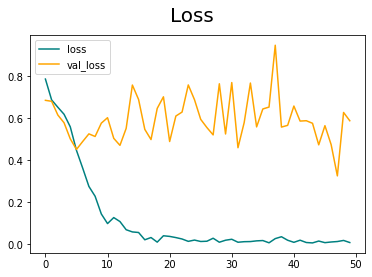

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

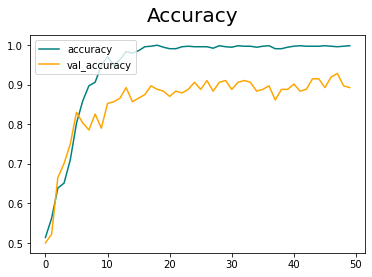

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [26]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.800000011920929 , Recall: 0.800000011920929, BinaryAccuracy: 0.8125


# Test

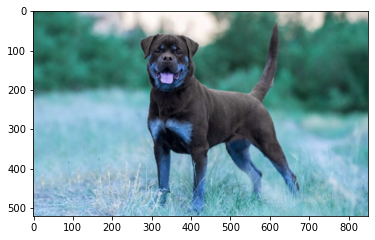

In [27]:
img = cv2.imread('/kaggle/input/cat-and-dog-classifier/data/dog_test2.jpg')
plt.imshow(img)
plt.show()

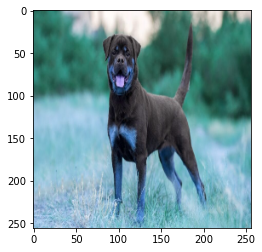

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [30]:
yhat

array([[0.9999902]], dtype=float32)

In [31]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


Thats All for now :D


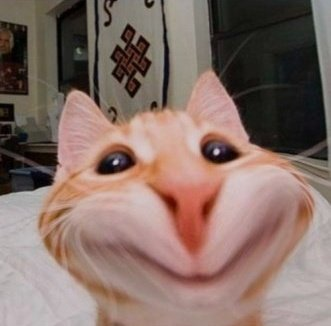